In [1]:
#importing libraries

import pandas as pd 
import numpy as np 

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [2]:
#reading the data

df=pd.read_csv(r'C:\Users\thoma\OneDrive\Desktop\pga08 0nline\winemag-data-130k-v2.csv')
df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [3]:
df.shape


(129971, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             129971 non-null  int64  
 1   country                129908 non-null  object 
 2   description            129971 non-null  object 
 3   designation            92506 non-null   object 
 4   points                 129971 non-null  int64  
 5   price                  120975 non-null  float64
 6   province               129908 non-null  object 
 7   region_1               108724 non-null  object 
 8   region_2               50511 non-null   object 
 9   taster_name            103727 non-null  object 
 10  taster_twitter_handle  98758 non-null   object 
 11  title                  129971 non-null  object 
 12  variety                129970 non-null  object 
 13  winery                 129971 non-null  object 
dtypes: float64(1), int64(2), object(11)


In [5]:
df.describe()

,Unnamed: 0,points,price
count,129971.000000,129971.000000,120975.000000
mean,64985.000000,88.447138,35.363389
std,37519.540256,3.039730,41.022218
min,0.000000,80.000000,4.000000
25%,32492.500000,86.000000,17.000000
50%,64985.000000,88.000000,25.000000
75%,97477.500000,91.000000,42.000000
max,129970.000000,100.000000,3300.000000


In [6]:
#unnamed is not an important feature .so we can simply drop the feature at the beginning itselfs

df.drop('Unnamed: 0',axis=1 , inplace=True)

In [7]:
df.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [8]:
df.isnull().mean()

country                  0.000485
description              0.000000
designation              0.288257
points                   0.000000
price                    0.069215
province                 0.000485
region_1                 0.163475
region_2                 0.611367
taster_name              0.201922
taster_twitter_handle    0.240154
title                    0.000000
variety                  0.000008
winery                   0.000000
dtype: float64

In [9]:
#region_2 contain 61.13% null values. it will not make any effective sense in the analysis. so we can simply drop the column also

df.drop('region_2' , axis=1, inplace=True)

In [10]:
#listing all numerical columns

num_list=df.select_dtypes(include= np.number)
num_list

,points,price
0,87,NaN
1,87,15.0
2,87,14.0
3,87,13.0
4,87,65.0
...,...,...
129966,90,28.0
129967,90,75.0
129968,90,30.0
129969,90,32.0


### EXPLORATORY DATA ANALYSIS

Text(0.5, 1.0, 'distribution of wine reviews of top 20 countries')

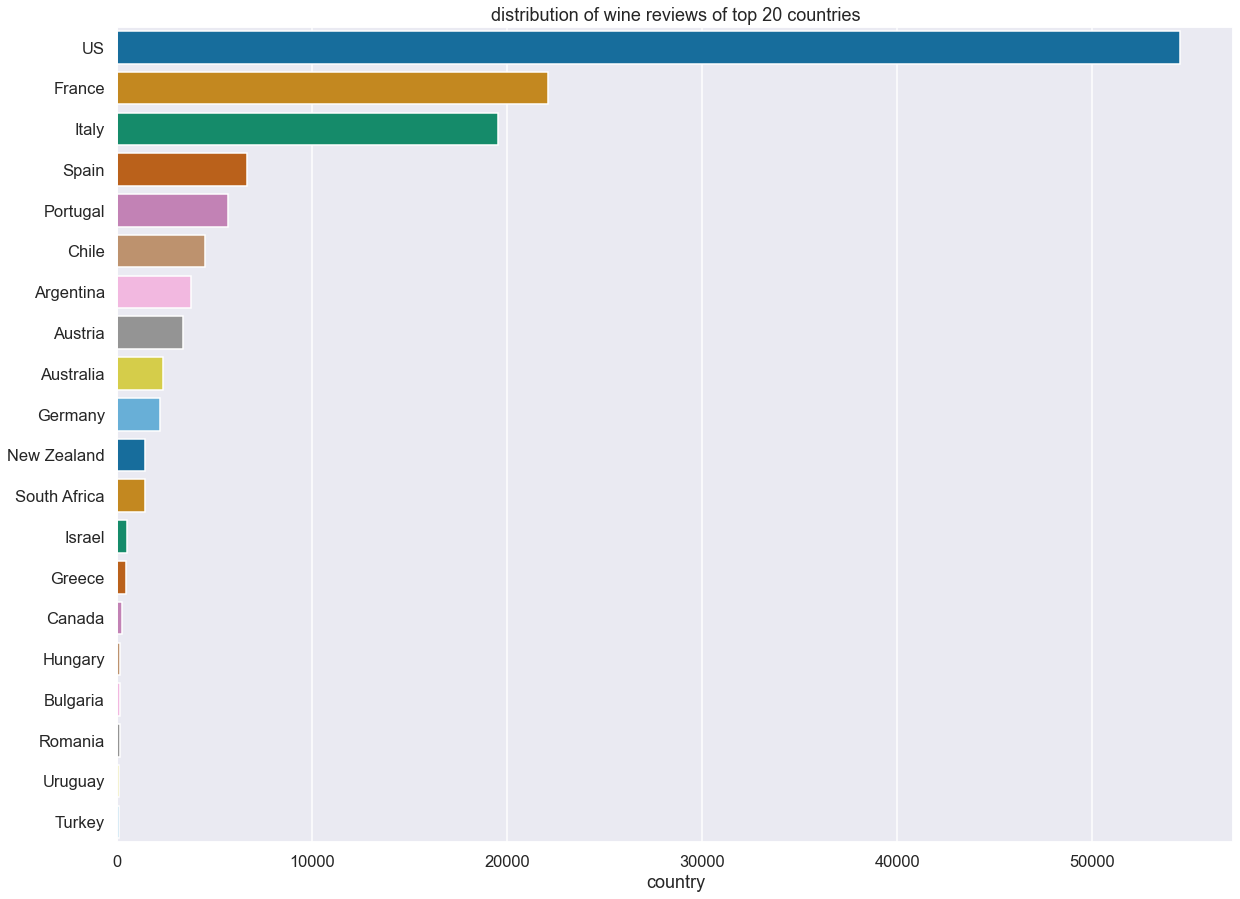

In [11]:
#distribution of wine reviews of top 20 countries

sns.set_context('talk')
plt.figure(figsize=(20,15))
data = df['country'].value_counts().to_frame()[0:20]

sns.barplot(x=data['country'] , y=data.index , data=data , palette='colorblind' , orient='h')

plt.title('distribution of wine reviews of top 20 countries')

Most reviewed country is US  ,then France and followed by Itally

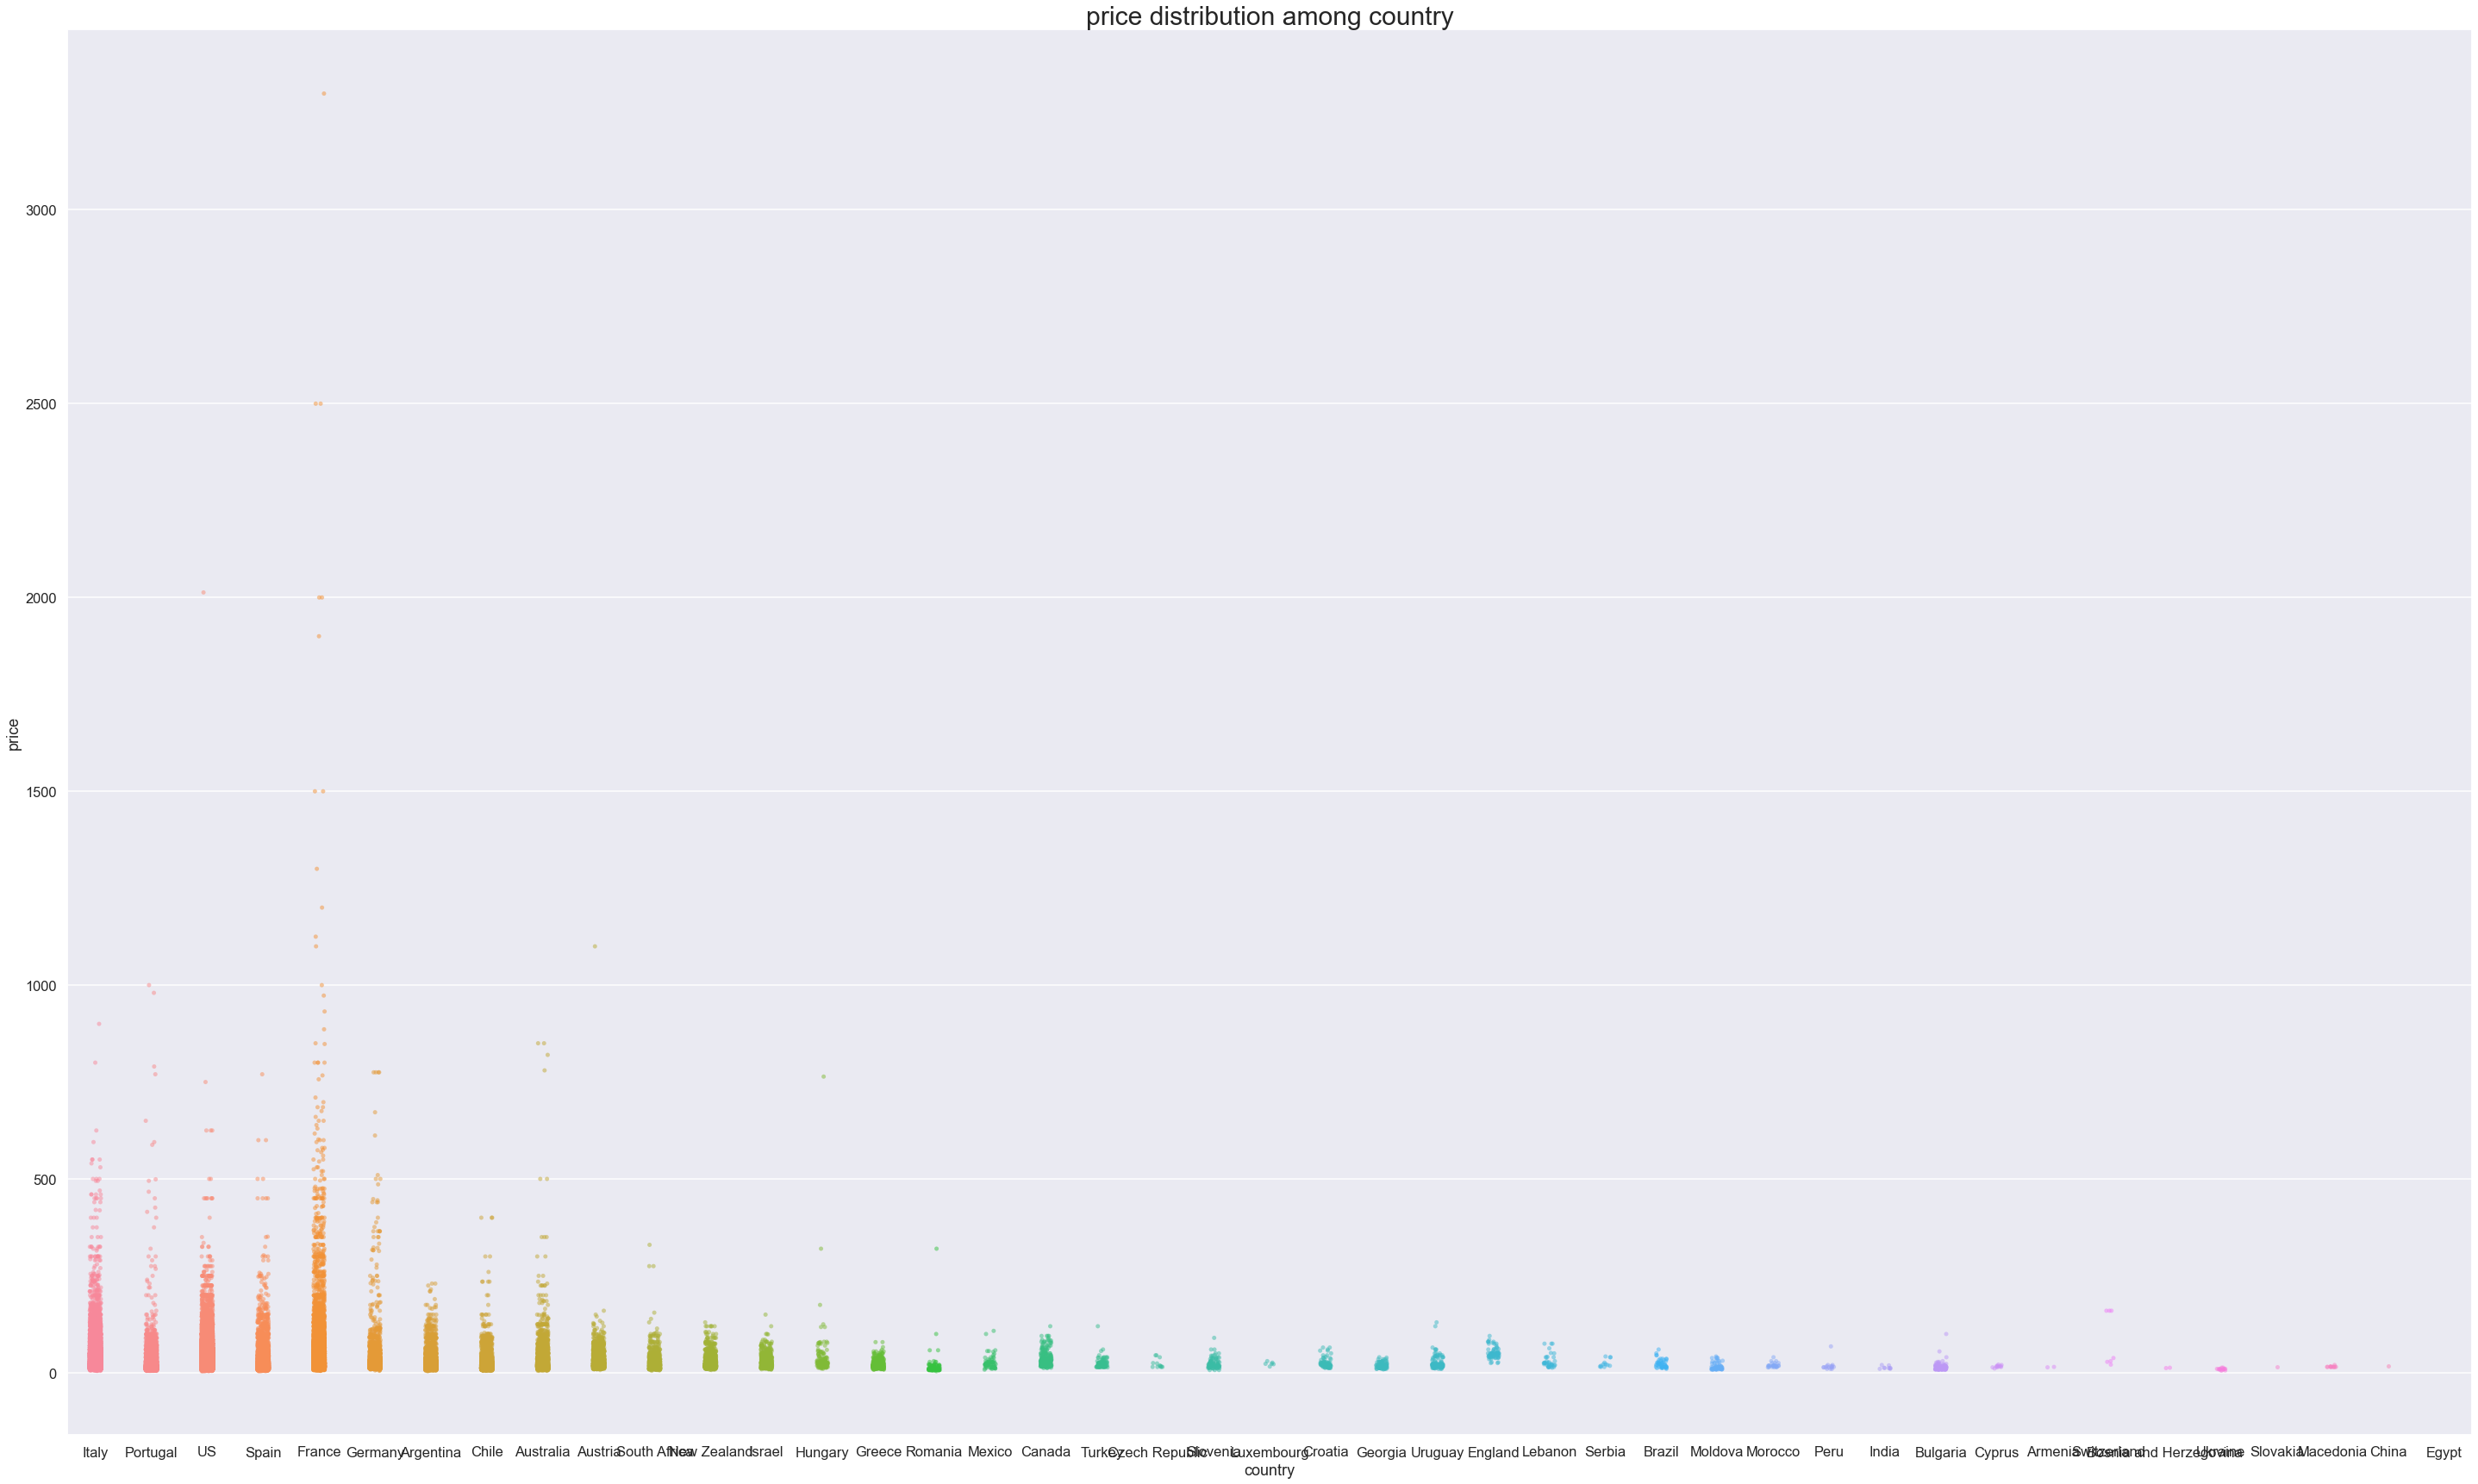

In [12]:
#distribution of country and price

data = df.groupby(['country']).median()['price'].sort_values(ascending=False).to_frame()

plt.figure(figsize=(50,30))
sns.stripplot( x='country' ,y='price', data=df , jitter=True , dodge=True , marker='o' , alpha=0.5)
plt.title('price distribution among country' , fontsize=30)
plt.show()

France has a range of prices and also the most expensive wines are at France

Text(0.5, 1.0, 'distribution of wine reviews of top 20 varieties')

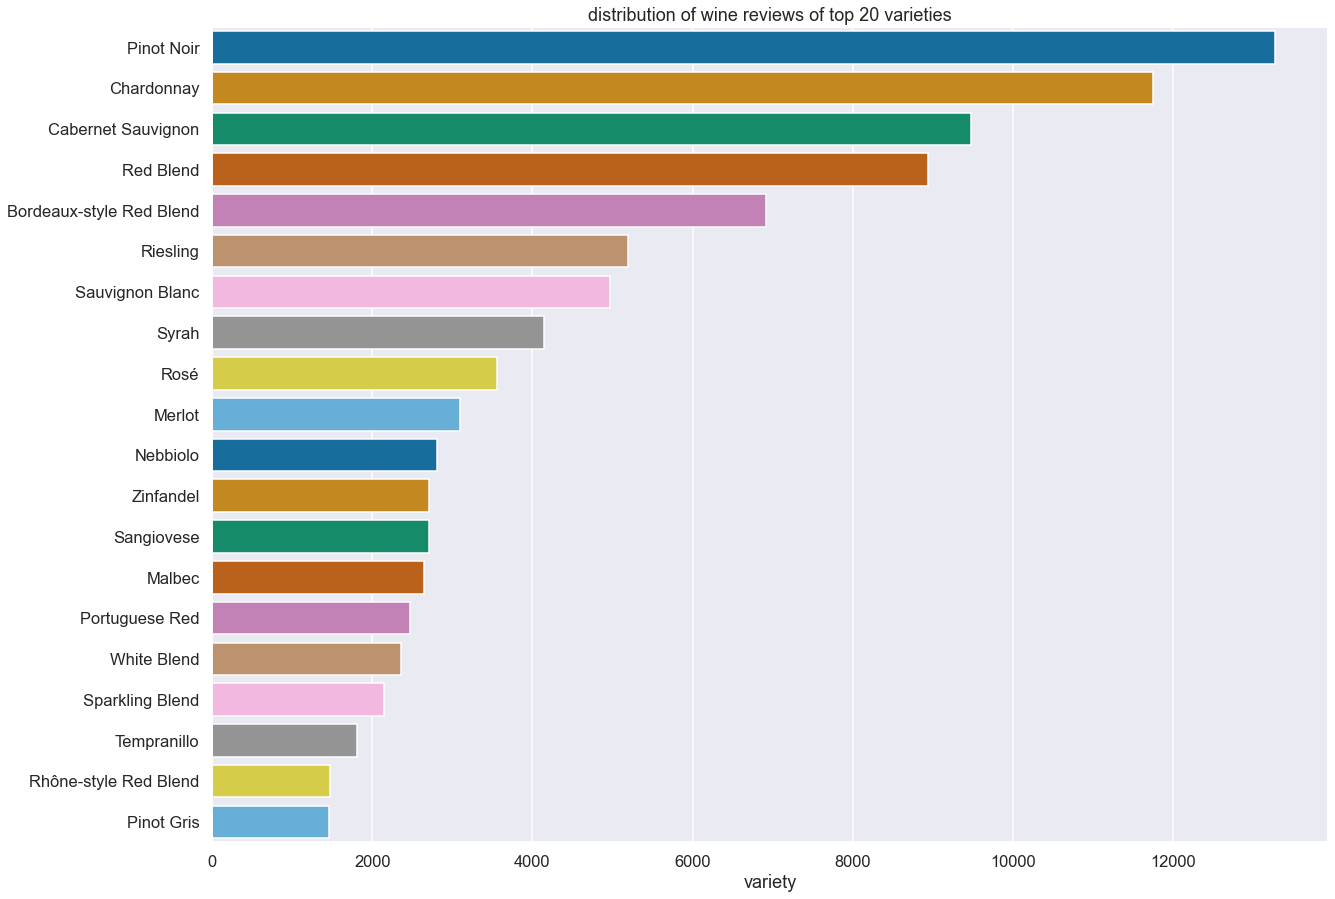

In [13]:
#distribution of top 20 wine verities 

sns.set_context('talk')
plt.figure(figsize=(20,15))
data = df['variety'].value_counts().to_frame()[0:20]

sns.barplot(x=data['variety'] , y=data.index , data=data , palette='colorblind' , orient='h')

plt.title('distribution of wine reviews of top 20 varieties')

most reviewed variety is pinot noir

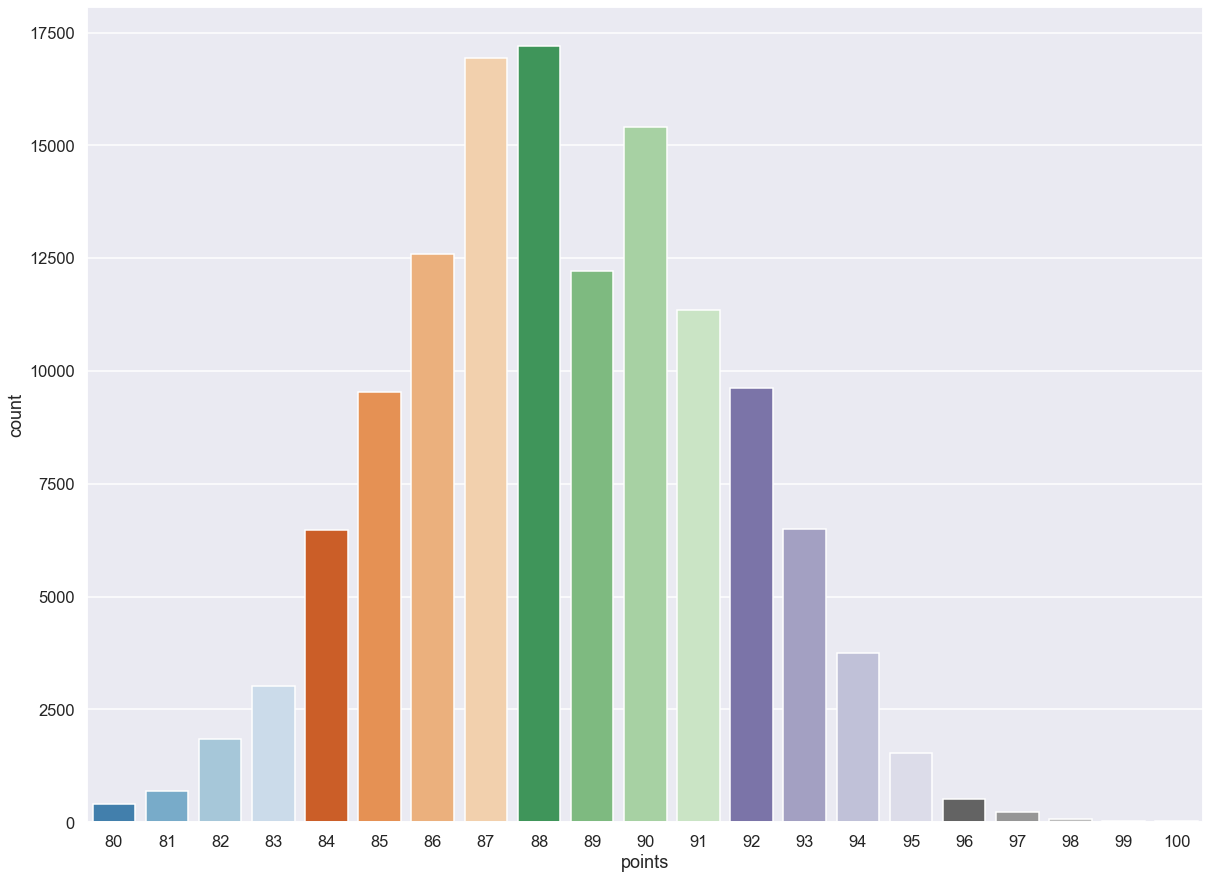

In [14]:
plt.figure(figsize=(20,15))
sns.countplot(x = 'points', data = df, palette = 'tab20c' )
plt.show()

Almost a normal distribution for featute points. 

In [15]:
data=df[['description', 'points']]
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   description  129971 non-null  object
 1   points       129971 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 2.0+ MB


,description,points
0,"Aromas include tropical fruit, broom, brimston...",87
1,"This is ripe and fruity, a wine that is smooth...",87
2,"Tart and snappy, the flavors of lime flesh and...",87
3,"Pineapple rind, lemon pith and orange blossom ...",87
4,"Much like the regular bottling from 2012, this...",87


In [16]:
data=data.assign(description_len = data['description'].apply(len))
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 3 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   description      129971 non-null  object
 1   points           129971 non-null  int64 
 2   description_len  129971 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 3.0+ MB


,description,points,description_len
0,"Aromas include tropical fruit, broom, brimston...",87,172
1,"This is ripe and fruity, a wine that is smooth...",87,227
2,"Tart and snappy, the flavors of lime flesh and...",87,186
3,"Pineapple rind, lemon pith and orange blossom ...",87,199
4,"Much like the regular bottling from 2012, this...",87,249


Text(0.5, 1.0, 'Description length per points')

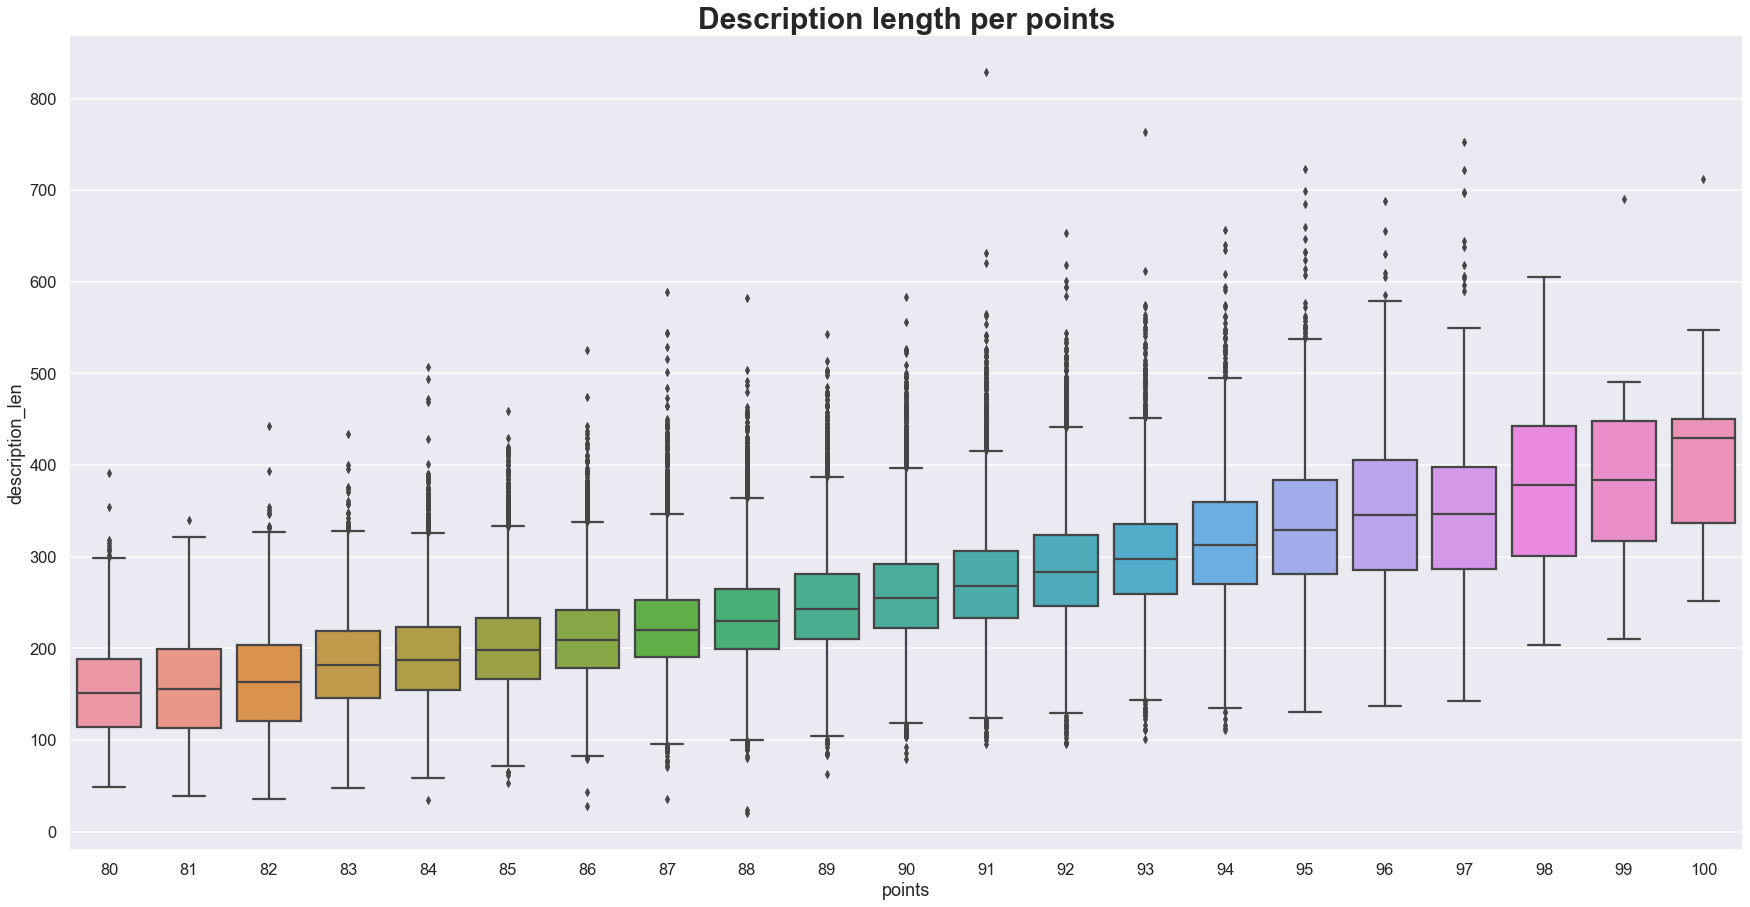

In [17]:
fig, ax=plt.subplots(figsize=(30,15))
sns.boxplot(x='points', y='description_len' , data = data)
ax.set_title('Description length per points' , fontweight='bold', size=30)

### FEATURE ENGINEERING

##### Handling duplicated values

In [18]:
# searching for duplicated values

df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
129966    False
129967    False
129968    False
129969    False
129970    False
Length: 129971, dtype: bool

In [19]:
# droping the duplicated values

df.drop_duplicates()

,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
...,...,...,...,...,...,...,...,...,...,...,...,...
129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,Anna Lee C. Iijima,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
129967,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation
129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser
129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss


##### Handling missing values

In [20]:
# searching for the null values

df.isnull().sum()

country                     63
description                  0
designation              37465
points                       0
price                     8996
province                    63
region_1                 21247
taster_name              26244
taster_twitter_handle    31213
title                        0
variety                      1
winery                       0
dtype: int64

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                129908 non-null  object 
 1   description            129971 non-null  object 
 2   designation            92506 non-null   object 
 3   points                 129971 non-null  int64  
 4   price                  120975 non-null  float64
 5   province               129908 non-null  object 
 6   region_1               108724 non-null  object 
 7   taster_name            103727 non-null  object 
 8   taster_twitter_handle  98758 non-null   object 
 9   title                  129971 non-null  object 
 10  variety                129970 non-null  object 
 11  winery                 129971 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 11.9+ MB


In [22]:
df['price'].fillna(df['price'].median() , inplace=True)
df['country'].fillna(df['country'].mode()[0] , inplace=True)
df['region_1'].fillna(df['region_1'].mode()[0] , inplace=True)
df['designation'].fillna(df['designation'].mode()[0] , inplace=True)
df['province'].fillna(df['province'].mode()[0] , inplace=True)
df['variety'].fillna(df['variety'].mode()[0] , inplace=True)

In [23]:
df['taster_name'].fillna(df['taster_name'].mode()[0] , inplace=True)

In [24]:
df.isnull().sum()

country                      0
description                  0
designation                  0
points                       0
price                        0
province                     0
region_1                     0
taster_name                  0
taster_twitter_handle    31213
title                        0
variety                      0
winery                       0
dtype: int64

In [25]:
# dropping feature taster twitter handle as it makes no sense to the target 
df.drop('taster_twitter_handle', axis=1, inplace= True)

In [26]:
df.shape

(129971, 11)

##### Outlier handling

C:\Users\thoma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

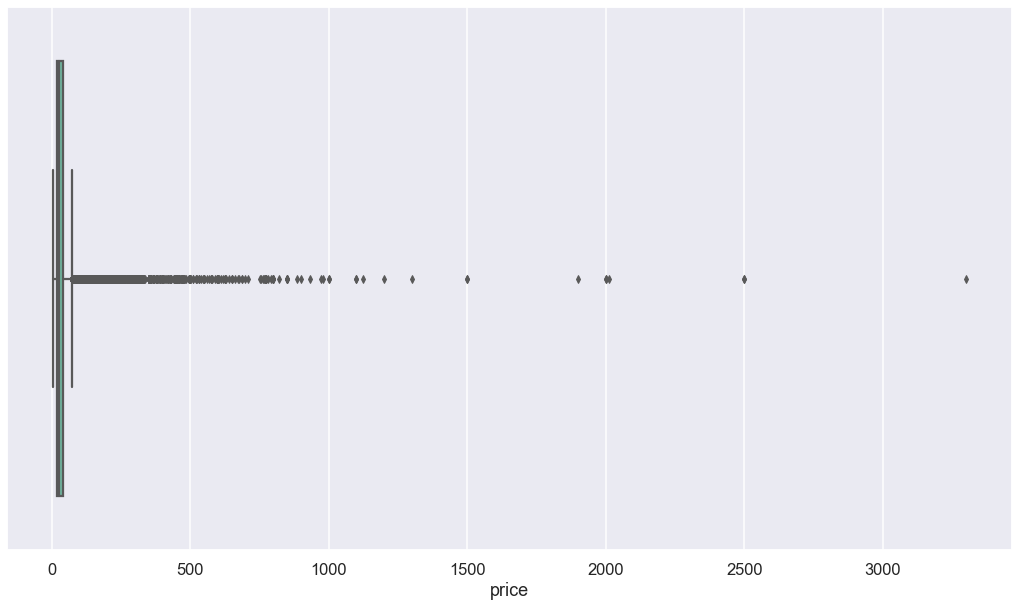

In [27]:
plt.figure(figsize=(18,10))
sns.boxplot(df['price'], palette = 'BuGn')

Hence price has many outliers and it is not normally distributed we have to deal with the outliers with IQR method

In [28]:
Q1 = df.price.quantile(0.25)
Q3 = df.price.quantile(0.75)

IQR = Q3 - Q1
df = df[(df.price>= Q1 - 3*IQR) & (df.price <= Q3 + 3*IQR)]

C:\Users\thoma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

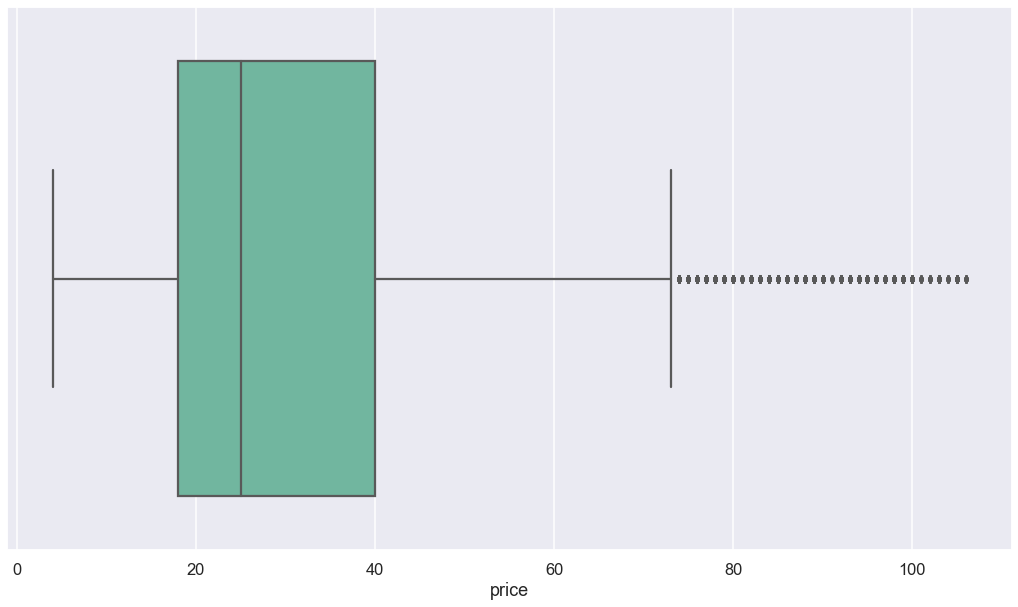

In [29]:
plt.figure(figsize=(18,10))
sns.boxplot(df['price'], palette = 'BuGn')

outliers are removed at a extend 

###### Feature selection

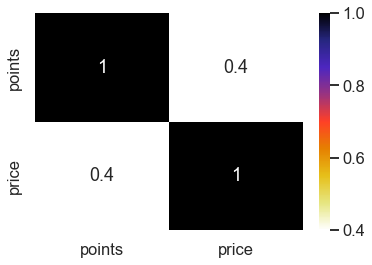

In [30]:
# Analyze the relation between dependent and independent variable using Correlation Matrix / Heatmap


cor = num_list.corr()
sns.heatmap(cor, annot = True, cmap = 'CMRmap_r')
plt.show()

There is some relation between price and points but not a strong one

### SPLITTING THE DATA AND MODEL BULIDING

In [31]:
#splitting data
X= df.drop(columns='price', axis= 1)
y=df['price']

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 32)

In [33]:
X_train.shape, X_test.shape, y_train.shape , y_test.shape

((101464, 10), (25367, 10), (101464,), (25367,))

##### -Catboost algorithm-

As the dataset contains huge amount of categorical features we need catboost algorithm to deal with it.

In [39]:
conda install catboost

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\thoma\anaconda3

  added / updated specs:
    - catboost


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    cairo-1.16.0               |       he04af86_2         1.5 MB
    catboost-1.0.6             |   py39haa95532_1        30.6 MB
    conda-22.9.0               |   py39haa95532_0         888 KB
    expat-2.4.9                |       h6c2663c_0         207 KB
    fribidi-1.0.10             |       h62dcd97_0          63 KB
    getopt-win32-0.1           |       h2bbff1b_0          19 KB
    glib-2.69.1                |       h5dc1a3c_1         1.6 MB
    graphite2-1.3.14           |       hd77b12b_1          91 KB
    graphviz-2.50.0            |       hdb8b0d4_0         903 KB
    gts-0.7.6                  |       h63ab5a1_3         181 KB
    harfbuzz-4.3.0             |       hda2c7e1_0    

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\thoma\anaconda3

  added / updated specs:
    - catboost


The following NEW packages will be INSTALLED:

  cairo              pkgs/main/win-64::cairo-1.16.0-he04af86_2
  catboost           pkgs/main/win-64::catboost-1.0.6-py39haa95532_1
  expat              pkgs/main/win-64::expat-2.4.9-h6c2663c_0
  fribidi            pkgs/main/win-64::fribidi-1.0.10-h62dcd97_0
  getopt-win32       pkgs/main/win-64::getopt-win32-0.1-h2bbff1b_0
  glib               pkgs/main/win-64::glib-2.69.1-h5dc1a3c_1
  graphite2          pkgs/main/win-64::graphite2-1.3.14-hd77b12b_1
  graphviz           pkgs/main/win-64::graphviz-2.50.0-hdb8b0d4_0
  gts                pkgs/main/win-64::gts-0.7.6-h63ab5a1_3
  harfbuzz           pkgs/main/win-64::harfbuzz-4.3.0-hda2c7e1_0
  libffi             pkgs/main/win-64::libffi-3.4.2-hd77b12b_4
  libgd              pkgs/main/win-64::libgd-2.3.3-ha43c60c_1
  pango              pkgs/mai

In [38]:
pip install ipywidgets

Note: you may need to restart the kernel to use updated packages.


In [50]:
#sorting categorical features

cat_fea=np.where(X.dtypes==np.object)[0]

C:\Users\thoma\AppData\Local\Temp\ipykernel_21900\848574943.py:3: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  cat_fea=np.where(X.dtypes==np.object)[0]


In [38]:
from catboost import Pool, CatBoostRegressor,cv

model=CatBoostRegressor(random_seed =360 , loss_function= 'RMSE' , iterations=500)

model.fit(X_train, y_train, cat_features = cat_fea , verbose=False)


In [39]:
y_pred=model.predict(X_test)

In [40]:
from sklearn import metrics

In [43]:
print('Mean absolute error:' , metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared error:' , metrics.mean_squared_error(y_test,y_pred))
print('Root Mean squared error:' , np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean absolute error: 7.234115628199597
Mean Squared error: 117.91964946700686
Root Mean squared error: 10.859081428325641


In [44]:
y_test.head()

3554     50.0
45998    70.0
10129    25.0
68663    30.0
47493    25.0
Name: price, dtype: float64

In [46]:
y_pred

array([48.46317027, 39.25087074, 21.181006  , ..., 45.19127576,
       84.85448596, 57.18290215])

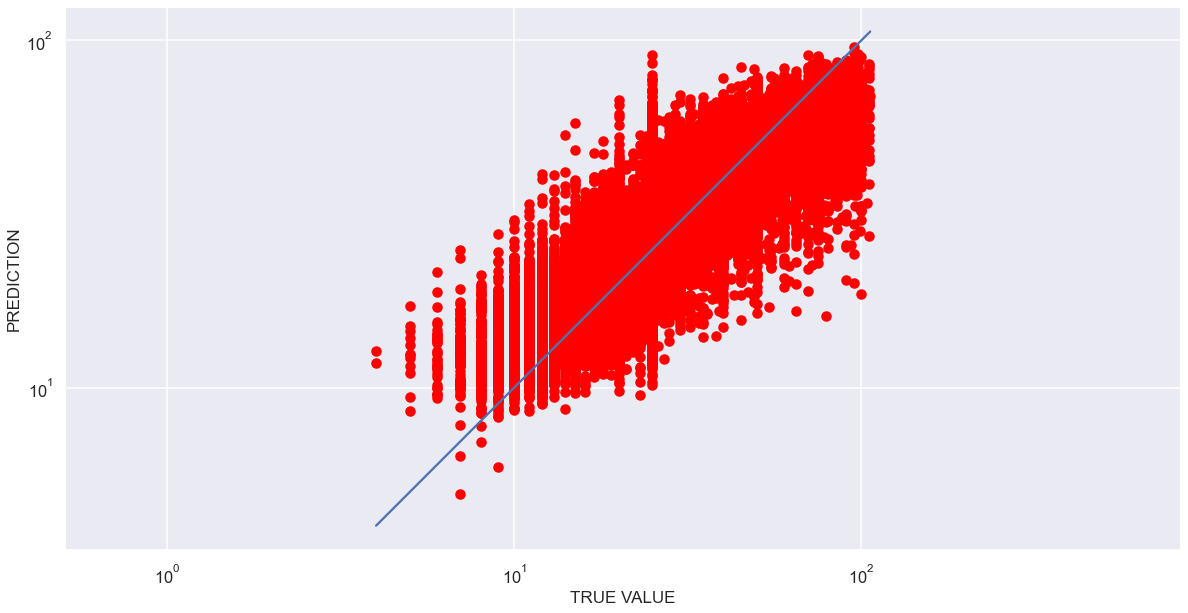

In [48]:
plt.figure(figsize=(20,10))
plt.scatter(y_test,y_pred, c='red')
plt.xscale('log')
plt.yscale('log')

p1=max(max(y_pred), max(y_test))
p2=min(min(y_pred) , min(y_test))
plt.plot([p1,p2] , [p1,p2] , 'b-')
plt.xlabel('TRUE VALUE', fontsize=17)
plt.ylabel('PREDICTION', fontsize=17)
plt.axis('equal')
plt.show()

C:\Users\thoma\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

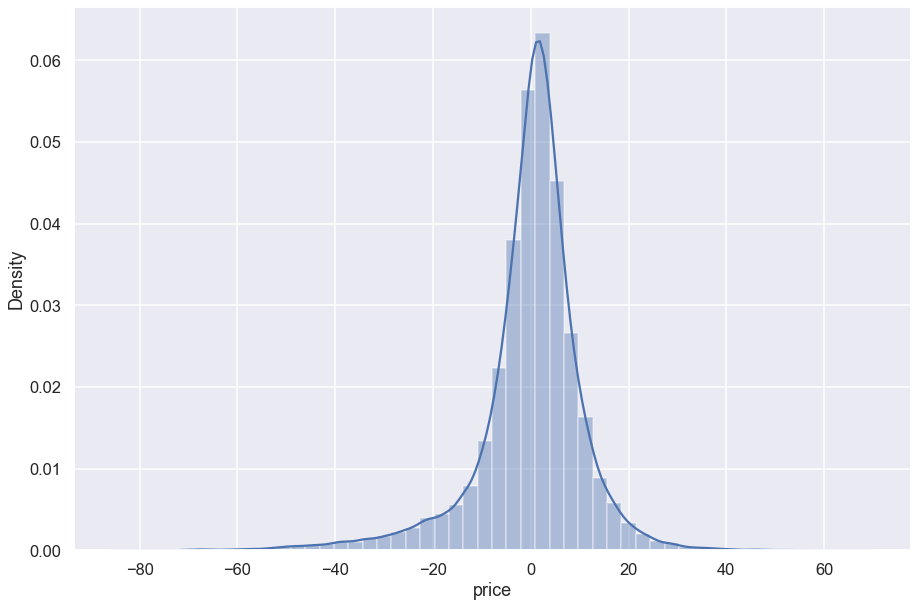

In [49]:
plt.figure(figsize=(15,10))
sns.distplot(y_pred-y_test)